In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
%matplotlib widget

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

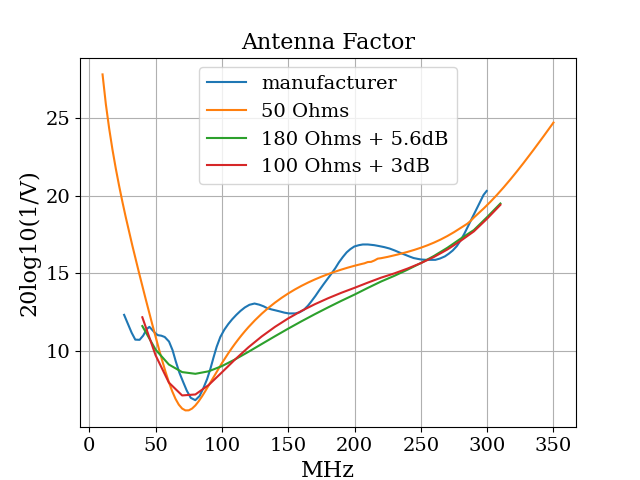

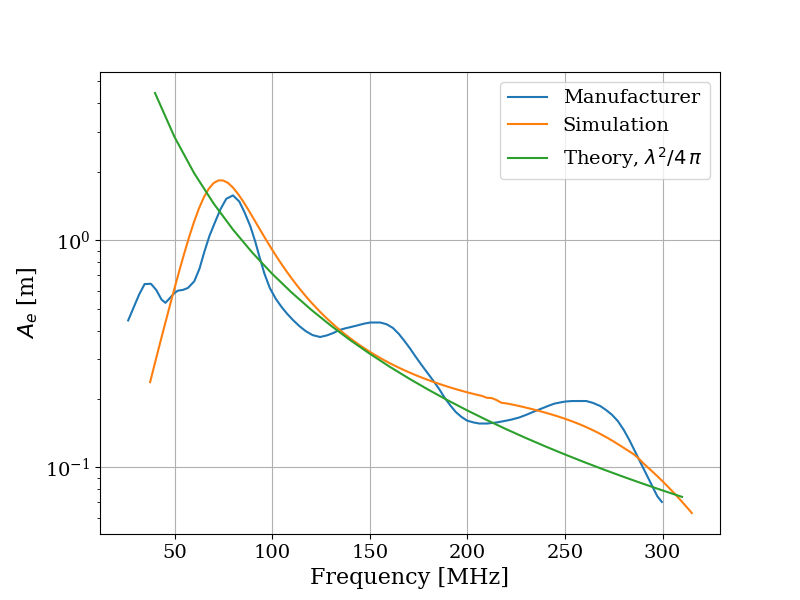

In [28]:
freqs_compower = pd.read_csv('./10m Compower AF-Table 1.csv')['Freq., MHz']
AF_compower = pd.read_csv('./10m Compower AF-Table 1.csv')['Manufacturer, ComPower']
freqs_comsol, AF_comsol_136ohm = np.loadtxt('./AF136Ohms_plus4p3dB.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_180ohm = np.loadtxt('./AF180Ohms_plus5p6dB.txt', skiprows = 5, unpack=True)
freqs_comsol_hiRes, AF_comsol_50ohm = np.loadtxt('./AF50Ohms.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_50ohm_130p4 = np.loadtxt('./AF50Ohms_130p4cmLong.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_50ohm_v3 = np.loadtxt('./AF50Ohms_130p4cmLong_51cmHigh.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_180ohm_v3 = np.loadtxt('./AF180OhmsPlus5p6_130p4cmLong_51cmHigh.txt', skiprows = 5, unpack=True)
freqs_comsol_higherres, AF_comsol_50ohm_v3_highres = np.loadtxt('./AF50Ohms_130p4cmLong_51cmHigh_highres.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_160ohm_v3 = np.loadtxt('./AF160Ohms_130p4cmLong_51cmHigh_plus0dB.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_100ohm_v3 = np.loadtxt('./AF100Ohms_130p4cmLong_51cmHigh_plus0dB.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_80ohm_v3 = np.loadtxt('./AF80Ohms_130p4cmLong_51cmHigh_plus0dB.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_60ohm_v3 = np.loadtxt('./AF60Ohms_130p4cmLong_51cmHigh_plus0dB.txt', skiprows = 5, unpack=True)
freqs_comsol, AF_comsol_40ohm_v3 = np.loadtxt('./AF40Ohms_130p4cmLong_51cmHigh_plus0dB.txt', skiprows = 5, unpack=True)

def AF_theory(freqs_MHz):
    c = 2.99e8
    AF = 20*np.log10(9.73/(c/(freqs_MHz*1e6)*np.sqrt(10**(-0.8/10))))
    return AF



plt.close('all')
plt.figure()
plt.title('Antenna Factor')
plt.plot(freqs_compower, AF_compower, label = 'manufacturer')
#plt.plot(freqs_comsol_hiRes, AF_comsol_50ohm, label = '50 Ohms')
#plt.plot(freqs_comsol,  AF_comsol_50ohm_130p4, label = '50 Ohms, 130.4cm')
#plt.plot(freqs_comsol,  AF_comsol_50ohm_v3, label = '50 Ohms')
plt.plot(freqs_comsol_higherres,  AF_comsol_50ohm_v3_highres, label = '50 Ohms')
plt.plot(freqs_comsol,  AF_comsol_180ohm_v3, label = '180 Ohms + 5.6dB')
#plt.plot(freqs_comsol, AF_comsol_136ohm, label = '138 Ohms')
#plt.plot(freqs_comsol, AF_comsol_180ohm, label = '180 Ohms')
plt.plot(freqs_comsol, AF_comsol_100ohm_v3 + 10*np.log10(100/50), label = '100 Ohms + 3dB')
#plt.plot(freqs_comsol, AF_comsol_80ohm_v3 + 10*np.log10(80/50), label = '80 Ohms + 3dB')

#plt.plot(freqs_comsol_hiRes, AF_theory(freqs_comsol_hiRes), label = f'9.73/($\lambda$ sqrt(G))')
plt.legend()
plt.grid(True)
plt.ylabel('20log10(1/V)')
plt.xlabel('MHz')
plt.show()

plt.figure(figsize=(8, 6))
#plt.title('Free Space Aperture', fontsize = 26)
plt.plot(freqs_compower, (2.75/(10**(AF_compower/20)))**2, label = 'Manufacturer')
#plt.plot(freqs_comsol_hiRes, AF_comsol_50ohm, label = '50 Ohms')
#plt.plot(freqs_comsol,  AF_comsol_50ohm_130p4, label = '50 Ohms, 130.4cm')
#plt.plot(freqs_comsol,  AF_comsol_50ohm_v3, label = '50 Ohms')
plt.plot(freqs_comsol_higherres[11:-14],  ((2.75/(10**(AF_comsol_50ohm_v3_highres/20)))**2)[11:-14], label = 'Simulation')
#plt.plot(freqs_comsol,  AF_comsol_180ohm_v3, label = '180 Ohms + 5.6dB')
#plt.plot(freqs_comsol, AF_comsol_136ohm, label = '138 Ohms')
#plt.plot(freqs_comsol, AF_comsol_180ohm, label = '180 Ohms')
#plt.plot(freqs_comsol, AF_comsol_100ohm_v3 + 10*np.log10(100/50), label = '100 Ohms + 3dB')
#plt.plot(freqs_comsol, AF_comsol_80ohm_v3 + 10*np.log10(80/50), label = '80 Ohms + 3dB')
plt.plot(freqs_comsol,(2.99e8/freqs_comsol*1e-6)**2/(4*np.pi), label = r'Theory, $\lambda^2/4\,\pi$' )

#plt.plot(freqs_comsol_hiRes, AF_theory(freqs_comsol_hiRes), label = f'9.73/($\lambda$ sqrt(G))')
plt.legend()
plt.grid(True)
plt.semilogy()
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$A_e$ [m]')
plt.xticks()
plt.yticks()
plt.show()
plt.tight_layout()

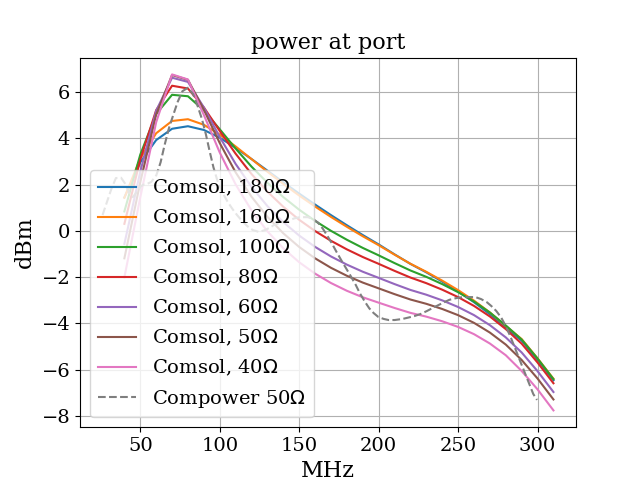

In [29]:
P_comsol_50 = (1/(10**(AF_comsol_50ohm_v3/20)))**2/50
P_comsol_180 = (1/(10**((AF_comsol_180ohm_v3-5.6)/20)))**2/180
P_comsol_160 = (1/(10**((AF_comsol_160ohm_v3)/20)))**2/160
P_comsol_100 = (1/(10**((AF_comsol_100ohm_v3)/20)))**2/100
P_comsol_80 = (1/(10**((AF_comsol_80ohm_v3)/20)))**2/80
P_comsol_60 = (1/(10**((AF_comsol_60ohm_v3)/20)))**2/60
P_comsol_40 = (1/(10**((AF_comsol_40ohm_v3)/20)))**2/40
P_man_50 = (1/(10**(AF_compower/20)))**2/50

plt.close('all')
plt.figure()
plt.title('power at port')
plt.plot(freqs_comsol, 10*np.log10(1000*P_comsol_180) ,label = f'Comsol, 180$\Omega$')
plt.plot(freqs_comsol, 10*np.log10(1000*P_comsol_160) ,label = f'Comsol, 160$\Omega$')
plt.plot(freqs_comsol, 10*np.log10(1000*P_comsol_100) ,label = f'Comsol, 100$\Omega$')
plt.plot(freqs_comsol, 10*np.log10(1000*P_comsol_80), label = f'Comsol, 80$\Omega$')
plt.plot(freqs_comsol, 10*np.log10(1000*P_comsol_60), label = f'Comsol, 60$\Omega$')
plt.plot(freqs_comsol, 10*np.log10(1000*P_comsol_50), label = f'Comsol, 50$\Omega$')
plt.plot(freqs_comsol, 10*np.log10(1000*P_comsol_40), label = f'Comsol, 40$\Omega$')
plt.plot(freqs_compower, 10*np.log10(1000*P_man_50), '--',label = f'Compower 50$\Omega$')
plt.xlabel('MHz')
plt.ylabel('dBm')
plt.legend()
plt.grid(True)

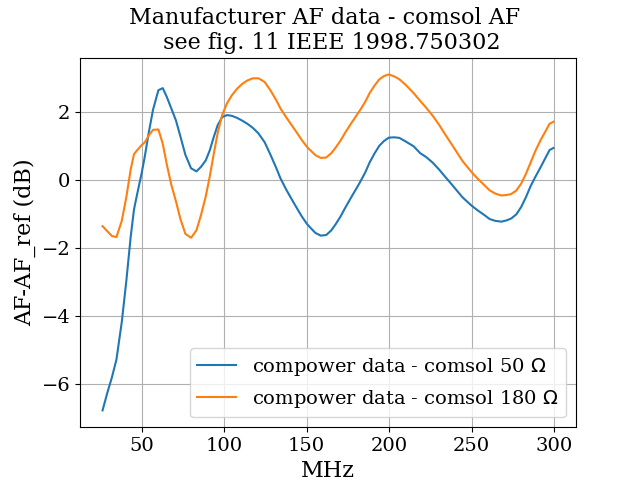

In [15]:
interpFunc = scipy.interpolate.interp1d(freqs_comsol_higherres,  AF_comsol_50ohm_v3_highres, kind='linear', fill_value='extrapolate')
AF_comsol_50ohm_v3_interp = interpFunc(freqs_compower)

interpFunc = scipy.interpolate.interp1d(freqs_comsol,  AF_comsol_180ohm_v3, kind='linear', fill_value='extrapolate')
AF_comsol_180ohm_v3_interp = interpFunc(freqs_compower)

plt.close('all')
plt.figure()
plt.title('Manufacturer AF data - comsol AF \n see fig. 11 IEEE 1998.750302')
plt.plot(freqs_compower, AF_compower - AF_comsol_50ohm_v3_interp, label = f'compower data - comsol 50 $\Omega$')
plt.plot(freqs_compower, AF_compower - AF_comsol_180ohm_v3_interp, label = f'compower data - comsol 180 $\Omega$')
plt.xlabel('MHz')
plt.ylabel('AF-AF_ref (dB)')
plt.legend()
plt.grid(True)

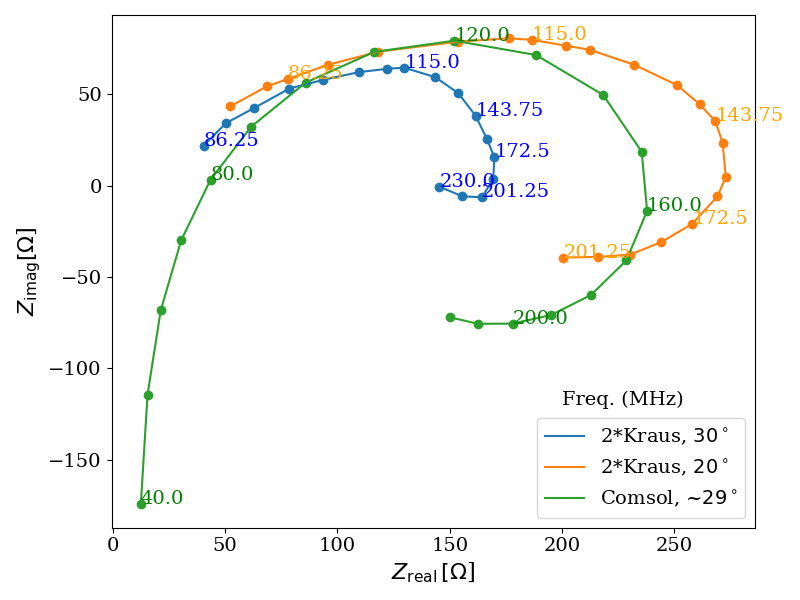

In [41]:
#antenna impedance
z_real_kraus_30, z_im_kraus_30    = np.loadtxt('./kraus_fig_8_13_30degreeAngel.csv',delimiter=',', skiprows = 0, unpack=True)
z_real_kraus_30, z_im_kraus_30    = 2*z_real_kraus_30, 2*z_im_kraus_30
l_lambda_idx_dict_30           =   {0 : 0.3, #where points land on l_lambda ticks in fig 8-13 in kraus. Set in plot digitizer 
                                 7 : 0.4,
                                10 : 0.5,
                                12 : 0.6,
                                14 : 0.7,
                                16 : 0.8 }

z_real_kraus_20, z_im_kraus_20    = np.loadtxt('./kraus_fig_8_13_20degreeAngel.csv',delimiter=',', skiprows = 0, unpack=True)
z_real_kraus_20, z_im_kraus_20    = 2*z_real_kraus_20, 2*z_im_kraus_20
l_lambda_idx_dict_20           =   {2 : 0.3, #where points land on l_lambda ticks in fig 8-13 in kraus. Set in plot digitizer 
                                 7 : 0.4,
                                13 : 0.5,
                                17 : 0.6,
                                21 : 0.7}

freq_comsol, z_real_comsol, z_im_comsol  = np.loadtxt('./zport_50Ohms_10_9_23.txt', skiprows = 5, unpack=True)
#take subset of comsol
comsol_end = 48
freq_comsol, z_real_comsol, z_im_comsol  = freq_comsol[0:-comsol_end] , z_real_comsol[0:-comsol_end] , z_im_comsol[0:-comsol_end] 

plt.close('all')
plt.figure(figsize=(8, 6))

plt.plot(z_real_kraus_30, z_im_kraus_30, label = f'2*Kraus, $30^\circ$')
plt.scatter(z_real_kraus_30, z_im_kraus_30)
for l_lambda_idx in l_lambda_idx_dict_30:
    #plt.scatter(z_real_kraus[l_lambda_idx], z_im_kraus[l_lambda_idx], color =  'r')
    plt.text(z_real_kraus_30[l_lambda_idx], z_im_kraus_30[l_lambda_idx], str(l_lambda_idx_dict_30[l_lambda_idx]*2.99e8/0.52 / 1e6/2), color = 'b',size = 14)

plt.plot(z_real_kraus_20, z_im_kraus_20, label = '2*Kraus, $20^\circ$')
plt.scatter(z_real_kraus_20, z_im_kraus_20)
for l_lambda_idx in l_lambda_idx_dict_20:
    #plt.scatter(z_real_kraus[l_lambda_idx], z_im_kraus[l_lambda_idx], color =  'r')
    plt.text(z_real_kraus_20[l_lambda_idx], z_im_kraus_20[l_lambda_idx], str(l_lambda_idx_dict_20[l_lambda_idx]*2.99e8/0.52 / 1e6/2), color = 'orange', size = 14)

for i in range(len(freq_comsol))[::4]:
    plt.text(z_real_comsol[i], z_im_comsol[i], str(freq_comsol[i]), color = 'green', size = 14)
plt.plot(z_real_comsol, z_im_comsol, label = 'Comsol, ~$29^\circ$')
plt.scatter(z_real_comsol, z_im_comsol)
    
#plt.title('Port Impedance for 52cm Bicon')
plt.text(200,-120, 'Freq. (MHz)', size = 14)
plt.xlabel(r"$Z_\mathrm{real}\,[\Omega$]")
plt.ylabel(r"$Z_\mathrm{imag} [\Omega$]")
plt.legend()
plt.tight_layout()

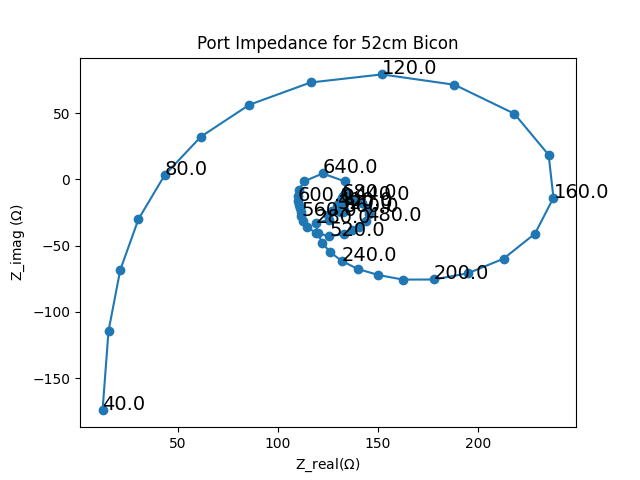

In [10]:
freq_comsol, z_real_comsol, z_im_comsol  = np.loadtxt('./zport_50Ohms_10_9_23.txt', skiprows = 5, unpack=True)
#take subset of comsol
comsol_end = 1
freq_comsol, z_real_comsol, z_im_comsol  = freq_comsol[0:-comsol_end] , z_real_comsol[0:-comsol_end] , z_im_comsol[0:-comsol_end] 

plt.close('all')
plt.figure()
plt.title('Port Impedance for 52cm Bicon')

for i in range(len(freq_comsol))[::4]:
    plt.text(z_real_comsol[i], z_im_comsol[i], str(freq_comsol[i]), size = 14)
plt.plot(z_real_comsol, z_im_comsol, label = 'Comsol, ~$29^\circ$')
plt.scatter(z_real_comsol, z_im_comsol)
plt.xlabel(f"Z_real($\Omega$)")
plt.ylabel(f"Z_imag ($\Omega$)")
plt.show()